In [4]:
import numpy as np
from scipy.constants import c, elementary_charge
import pandas as pd
import pickle as pkl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [24,16] # bigger figures
from matplotlib import style
style.use('fivethirtyeight')
import os

In [5]:
# import package
# installed via pip
from emtracks.particle import trajectory_solver # main solver object
from emtracks.conversions import one_gev_c2_to_kg # conversion for q factor (transverse momentum estimate)
from emtracks.tools import *#InitConds # initial conditions namedtuple
from emtracks.mapinterp import get_df_interp_func  # factory function for creating Mu2e DS interpolation function
from emtracks.Bdist import get_B_df_distorted
import matplotlib.animation as animation

ERROR! Please set $EMTRACKS_DDIR and $EMTRACKS_PDIR. Setting defaults (current directory)


In [9]:
testdir = "/home/darren/Desktop/plots/"
datadir = "/home/shared_data/"
plotdir = datadir+"plots/randomphi/"
mapdir = datadir+"Bmaps/"
date = "/6-20/"
newdir = datadir+'50_Gauss_z_3-14'

In [10]:
def readpickle():
    files = sorted(os.listdir(newdir))
    files[0], files[1], files[2], files[3] = files[2], files[3], files[0], files[1]

    phinom = []
    phidis = []
    nomdata = []
    disdata = []

    nom = {}
    dis = {}

    for file in files:
        if file.endswith('nom.pkl'):
            e_solvernom = trajectory_solver.from_pickle(newdir+'/'+file)
            phinom.append(e_solvernom.init_conds.phi0)
            nomdata.append(e_solvernom.dataframe)
            #nom.update({str(e_solvernom.init_conds.phi0), e_solvernom.dataframe})
            
        if file.endswith('dis.pkl'):
            e_solverdis = trajectory_solver.from_pickle(newdir+'/'+file)
            phidis.append(e_solverdis.init_conds.phi0)
            disdata.append(e_solverdis.dataframe)
            #dis.update({str(e_solverdis.init_conds.phi0), e_solverdis.dataframe})
    if phinom == phidis:
        for i in range(0, len(phinom), 1):
            nom.update({phinom[i]:nomdata[i]})
            dis.update({phidis[i]:disdata[i]})
            
    if phinom == phidis:
        return nom, dis, phinom, len(phinom)

In [11]:
x, y, z, t = readpickle()


In [114]:
x[z[4]]

,t,x,y,z,px,py,pz,pT,p,E,beta,v,vx,vy,vz,theta,phi,r
0,0.000000e+00,0.054094,0.038730,5.988901,87.984627,22.828856,52.480000,90.898026,104.96,104.961244,0.999988,2.997889e+08,2.513035e+08,6.520425e+07,1.498945e+08,1.047198,0.253866,0.066530
1,2.000000e-12,0.054597,0.038861,5.989201,87.927843,23.047510,52.479599,90.898258,104.96,104.961244,0.999988,2.997889e+08,2.511413e+08,6.582877e+07,1.498933e+08,1.047202,0.256351,0.067015
2,4.000000e-12,0.055099,0.038994,5.989500,87.870518,23.266004,52.479202,90.898487,104.96,104.961244,0.999988,2.997889e+08,2.509776e+08,6.645284e+07,1.498922e+08,1.047206,0.258836,0.067501
3,6.000000e-12,0.055601,0.039127,5.989800,87.812654,23.484337,52.478808,90.898715,104.96,104.961244,0.999988,2.997889e+08,2.508123e+08,6.707645e+07,1.498910e+08,1.047211,0.261321,0.067988
4,8.000000e-12,0.056102,0.039262,5.990100,87.754251,23.702507,52.478417,90.898940,104.96,104.961244,0.999988,2.997889e+08,2.506455e+08,6.769959e+07,1.498899e+08,1.047215,0.263806,0.068476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,3.999200e-08,-0.159927,0.121639,13.963945,47.159579,-44.252134,82.669972,64.670529,104.96,104.961244,0.999988,2.997889e+08,1.346982e+08,-1.263939e+08,2.361237e+08,0.663838,-0.753603,0.200929
19997,3.999400e-08,-0.159657,0.121387,13.964417,47.215237,-44.191706,82.670527,64.669819,104.96,104.961244,0.999988,2.997889e+08,1.348571e+08,-1.262213e+08,2.361253e+08,0.663830,-0.752333,0.200562
19998,3.999600e-08,-0.159387,0.121134,13.964889,47.270792,-44.131251,82.671074,64.669121,104.96,104.961244,0.999988,2.997889e+08,1.350158e+08,-1.260486e+08,2.361268e+08,0.663821,-0.751063,0.200194
19999,3.999800e-08,-0.159117,0.120882,13.965362,47.326244,-44.070771,82.671611,64.668433,104.96,104.961244,0.999988,2.997889e+08,1.351742e+08,-1.258758e+08,2.361284e+08,0.663813,-0.749794,0.199827


In [4]:
def get_uniform_phi(N):
    phis = np.linspace(0, 2*math.pi, N)
    return phis

In [ ]:
phi = 0.0
with open(datadir+f'50_Gauss_z_3-14/{phi}_nom.pkl', 'rb') as f:
    data = pkl.load(f)
    
#input N, return N equally spaced values between 0 and 2pi


phis = get_uniform_phi(100)
phi = 0.0
dataframenom = pkl.load(datadir+f'50_Gauss_z_3-14/{phi}_nom.pkl')
dataframenom = pkl.load((open(datadir+f'50_Gauss_z_3-14/{0.0}_{dis}.pkl')))

In [5]:
#I NEED A FILE THAT GIVES N, PHIS, THEN I NEED TO ACTUALYL LOAD IN THE DATA USING READ_PICKLE (WHICH ISNT WORKING NOW)

def readpickle():
    #N = int(np.load(testdir+'lineargraded/nval.npy'))
    N = 15
    #phis = np.load(testdir+'lineargraded/phis.npy')
    phis = get_uniform_phi(15)
    
    # N = 100
    #phis = get_uniform_phi(N)
    nomdata = {}
    disdata = {}
    for phi in phis:
        dataframenom = pd.read_pickle(testdir+'lineargraded/50gaussnom/'+str(phi))
        dataframedis = pd.read_pickle(testdir+'lineargraded/50gaussdis/'+str(phi))
        nomdata.update({str(phi): dataframenom})
        disdata.update({str(phi): dataframedis})
    return nomdata, disdata, phis, N

In [8]:
def find_track_at_z(df, z): 
    delta = (df.z.max() - df.z.min()) / len(df.z)
    #delta = 10/4001   #approximate z range divided by number of points
    mask = (df['z'] < z + delta) & (df['z'] > z - delta)
    
    while (len(df.z[mask]) > 2):
        delta = delta / 2
        mask = (df.z < z + delta) & (df.z > z - delta)
    while (len(df.z[mask]) == 0):
        delta = delta*2
        mask = (df.z < z + delta) & (df.z > z - delta)
    df2 = df.loc[mask]
    df2 = df2.apply(pd.to_numeric)
    return ([df2.iloc[0]['x'], df2.iloc[0]['y'], df2.iloc[0]['z'], df2.iloc[0]['t'], df2.iloc[0]['r']])

In [9]:
nomdata, disdata, phis, N = readpickle()

In [28]:
nomdata['0.0']['r']
mask = nomdata['0.0']['r'] < 0
nomdata['0.0']['r'][mask]

Series([], Name: r, dtype: float64)

In [52]:
nx, ny, nz, nt, nr = find_track_at_z(nomdata[str(phis[0])], 13)
nt

3.5628e-08

In [58]:
def restructure1(phis, nomdata, disdata, z):
    nts = []
    nxs = []
    nys = []
    nzs = []
    nrs = []
    
    dts = []
    dxs = []
    dys = []
    dzs = []
    drs = []

    for i in range (0, len(nomdata), 1): #len(nomdata) = #of phis
        nx, ny, nz, nt, nr = find_track_at_z(nomdata[str(phis[i])], z)
        dx, dy, dz, dt, dr = find_track_at_z(disdata[str(phis[i])], z)
        
        nts.append(nt)
        nxs.append(nx)
        nys.append(ny)
        nzs.append(nz)
        nrs.append(nr)
        
        dts.append(dt)
        dxs.append(dx)
        dys.append(dy)
        dzs.append(dz)
        drs.append(dr)
           
    nts = np.array(nts)
    nxs = np.array(nxs)
    nys = np.array(nys)
    nzs = np.array(nzs)
    nrs = np.array(nrs)
    
    dts = np.array(dts)
    dxs = np.array(dxs)
    dys = np.array(dys)
    dzs = np.array(dzs)
    drs = np.array(drs)
    
    x = (nts, phis, nrs, nxs, nys, nzs)
    y = (dts, phis, drs, dxs, dys, dzs)
    
    return x, y

In [59]:
x, y = hi(phis, nomdata, disdata, 13)

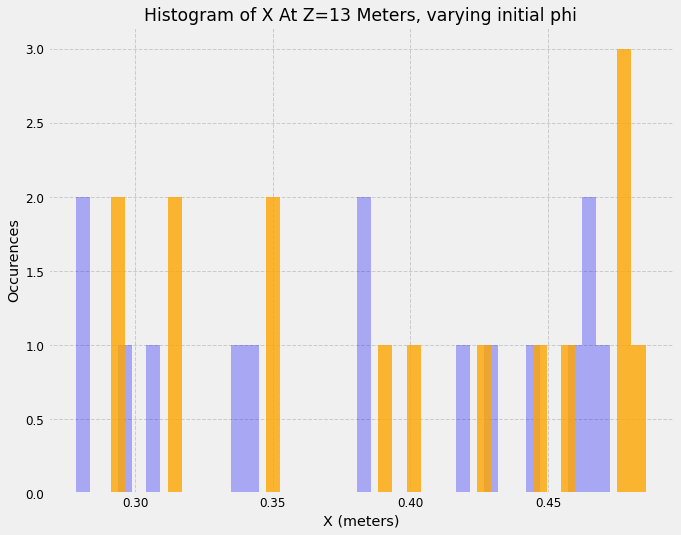

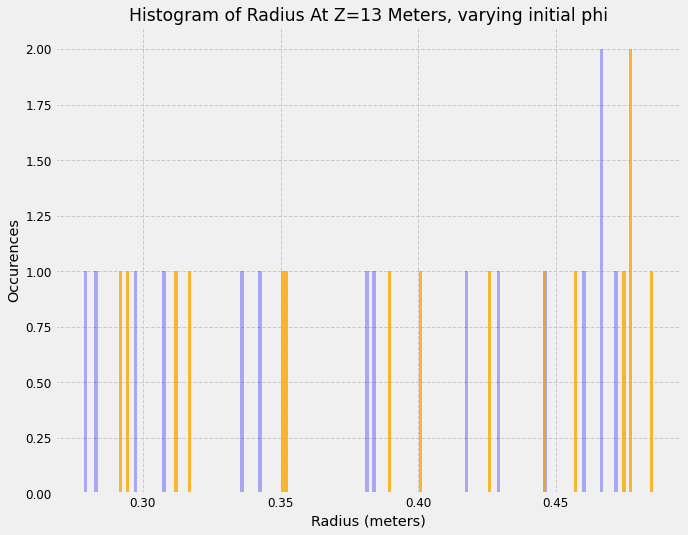

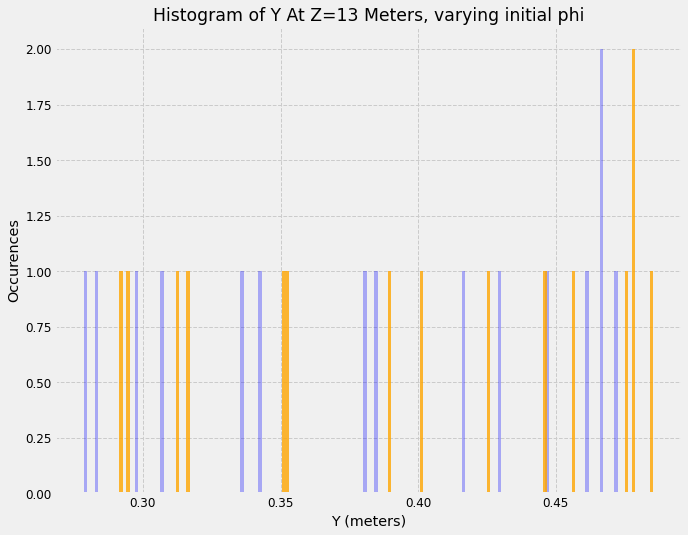

In [68]:
def simpleplots(x, y):
    fig1 = plt.figure()
    x1, x2 = x[2], y[2]
    num_bins = 20
    x1num_bins = int((max(x1) - min(x1)) / 0.005)
    x2num_bins = int((max(x2) - min(x2)) / 0.005)

    plt.hist(x[2], alpha = 0.3, bins = x1num_bins, facecolor='blue', label = 'Mu2e Field')
    plt.hist(y[2], alpha = 0.8, bins = x2num_bins, facecolor='orange', label = 'Graded Field')
    plt.xlabel('X (meters)')
    plt.ylabel('Occurences')
    plt.title('Histogram of X At Z=13 Meters, varying initial phi')  
    fig1.show   

    fig2 = plt.figure()
    x1, x2 = x[3], y[3]
    num_bins = 20
    x1num_bins = int((max(x1) - min(x1)) / 0.005)
    x2num_bins = int((max(x2) - min(x2)) / 0.005)

    plt.hist(x[2], alpha = 0.3, bins = x1num_bins, facecolor='blue', label = 'Mu2e Field')
    plt.hist(y[2], alpha = 0.8, bins = x2num_bins, facecolor='orange', label = 'Graded Field')
    plt.xlabel('Radius (meters)')
    plt.ylabel('Occurences')
    plt.title('Histogram of Radius At Z=13 Meters, varying initial phi')  
    fig2.show   
    
    fig3 = plt.figure()
    x1, x2 = x[4], y[4]
    num_bins = 20
    x1num_bins = int((max(x1) - min(x1)) / 0.005)
    x2num_bins = int((max(x2) - min(x2)) / 0.005)

    plt.hist(x[2], alpha = 0.3, bins = x1num_bins, facecolor='blue', label = 'Mu2e Field')
    plt.hist(y[2], alpha = 0.8, bins = x2num_bins, facecolor='orange', label = 'Graded Field')
    plt.xlabel('Y (meters)')
    plt.ylabel('Occurences')
    plt.title('Histogram of Y At Z=13 Meters, varying initial phi')  
    fig3.show   
    
simpleplots(x, y)

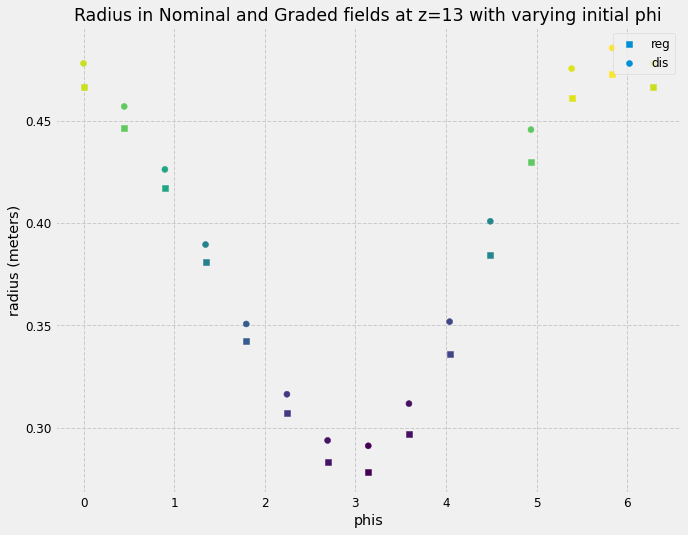

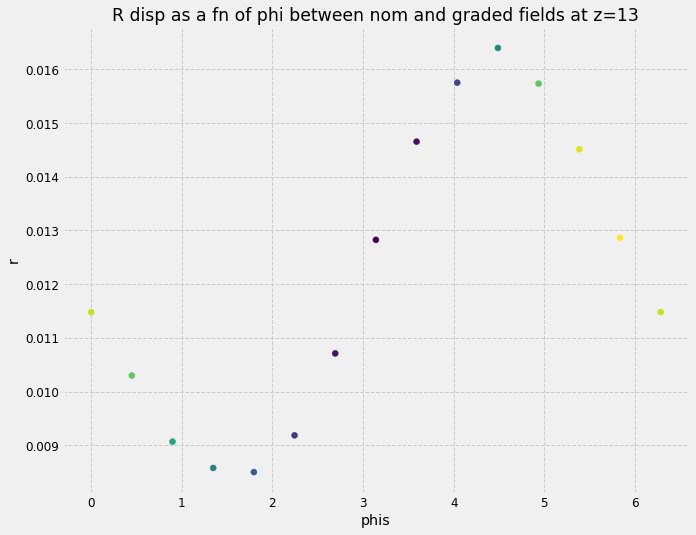

In [70]:
def plot_joint_not_hist(x, y): #(ts, phis, rs, xs, ys, zs)
    phis = x[1]
    xs = x[2]
    ys = y[2]

    fig1 = plt.figure()
    plt.scatter(phis, xs, c=x[0], marker='s', label='reg')
    plt.scatter(phis, ys, c=x[0], marker='o', label ='dis')
    plt.legend(loc='upper right')
    plt.xlabel("phis")
    plt.ylabel("radius (meters)")
    plt.title("Radius in Nominal and Graded fields at z=13 with varying initial phi")
    plt.show()

    dev = y[2]-x[2]
    fig2 = plt.figure()
    plt.scatter(phis, dev, c=x[0])
    plt.xlabel("phis")
    plt.ylabel("r")
    plt.title("R disp as a fn of phi between nom and graded fields at z=13")
    plt.show()
    
plot_joint_not_hist(x, y)

In [ ]:
find_track_at_z(nomdata[str(phis[1])], 10)

In [ ]:
def restructure(zstart, zend, numpoints):   #rmax, rmin, xmax, xmin, ymax, ymin
    q = np.linspace(zstart, zend, numpoints) #all the z values u need in a list
    nomdata, disdata, phis, N = readpickle() #get all your info
    e = np.tile(q, len(phis)) #repeat q len(phis) times in the same list
    f = np.repeat(phis, numpoints) #phis list repeated numpoints times
    
    nomfinaldata = []
    disfinaldata = []
    
    #construct the data in two different ways (seems inefficient by looping this many times)
    for phi in phis:
        for i in q:
            nomfinaldata.append(find_track_at_z(nomdata[str(phi)], i))
            disfinaldata.append(find_track_at_z(disdata[str(phi)], i))
    
    nomfinaldatares = []
    disfinaldatares = []
     
    for i in q:
        transitionlistnom = []
        transitionlistdis = []
        
        for phi in phis:
            transitionlistnom.append(find_track_at_z(nomdata[str(phi)], i))
            transitionlistdis.append(find_track_at_z(disdata[str(phi)], i))
        
        nomfinaldatares.append(transitionlistnom)
        disfinaldatares.append(transitionlistdis)
    
    #construct dataframes
    arrays = (f, e)
    tuples = list(zip(*arrays))
    index = pd.MultiIndex.from_tuples(tuples, names = ['phi', 'z_val'])
    
    df1 = pd.DataFrame(nomfinaldata, columns = ["X", "Y", "Z", "T", "R"], index = index)
    df2 = df1.stack().unstack(0)
    
    return nomfinaldatares, disfinaldatares, e, f, q, numpoints, df1, df2

In [ ]:
x = restructure(6, 13, 200)

#nominaldata = x[0]
#gradeddata = x[1]
nomfinaldatares = np.array(x[0])
disfinaldatares = np.array(x[1])
indices = x[2]
phi_index = x[3]
q = (x[4])
numpoints = x[5]
df1 = x[6]
df2 = x[7]



In [ ]:
def plotdifferences(phis, q, nomfinaldatares, disfinaldatares):
    title = phis.tolist()
    title.insert(0, 'z')
    xdif = [title]
    ydif = [title]
    rdif = [title]

    for i in range(0, len(nomfinaldatares), 1): #specific z value
        xtransitionlist = [q[i]] #all the z points u want
        ytransitionlist = [q[i]]
        rtransitionlist = [q[i]]
    
        for j in range(0, len(nomfinaldatares[0])): #specific phi value
            xtransitionlist.append(nomfinaldatares[i][j][0] - disfinaldatares[i][j][0])
            ytransitionlist.append(nomfinaldatares[i][j][1] - disfinaldatares[i][j][1])
            rtransitionlist.append(nomfinaldatares[i][j][4] - disfinaldatares[i][j][4])
    
        xdif.append(xtransitionlist)
        ydif.append(ytransitionlist)
        rdif.append(rtransitionlist)  #rdif[0] - has same z values, rdif[0][1] has same phi value, 
                                      #rdif[i][0] when i > 0 is the z value for that block
                                      #phi values top row
    fig = plt.figure()
    for i in range(1, len(rdif), 1):
        a = np.full((len(rdif[1])-1), rdif[i][0])
        plt.scatter(a, rdif[i][1:], c = rdif[0][1:])
     
    plt.xlabel("z (meters)")
    plt.ylabel("r_deviations (meters)")
    plt.title("Radial Deviations for 15 Particle Tracks at Z due to 50 Gauss Linear Graded Bdist (blue-0, red-pi)")
    fig.savefig(testdir+'6-22-7')

    fig1 = plt.figure()
    for i in range(1, len(xdif), 1):
        a = np.full((len(xdif[1])-1), xdif[i][0])
        plt.scatter(a, xdif[i][1:], c = xdif[0][1:])
    
    plt.xlabel("z (meters)")
    plt.ylabel("x_deviations (meters)")
    plt.title("X Deviations for 15 Particle Tracks at Z in MU2E Detector due to 50 Gauss Linear Graded Bdist")
    fig1.savefig(testdir+'6-22-8')

    fig2 = plt.figure()
    for i in range(1, len(ydif), 1):
        a = np.full((len(ydif[1])-1), ydif[i][0])
        plt.scatter(a, ydif[i][1:], c = ydif[0][1:])
    
    plt.xlabel("z (meters)")
    plt.ylabel("y_deviations (meters)")
    plt.title("Y Deviations for 15 Particle Tracks at Z in MU2E Detector due to 50 Gauss Linear Graded Bdist")
    plt.show()
    fig2.savefig(testdir+'6-22-9')

In [ ]:
plotdifferences(phis, q, nomfinaldatares, disfinaldatares)

ERROR! Please set $EMTRACKS_DDIR and $EMTRACKS_PDIR. Setting defaults (current directory)


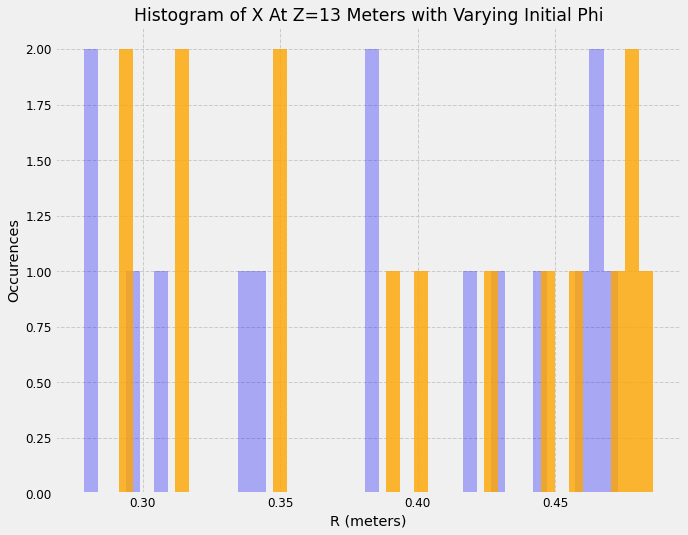

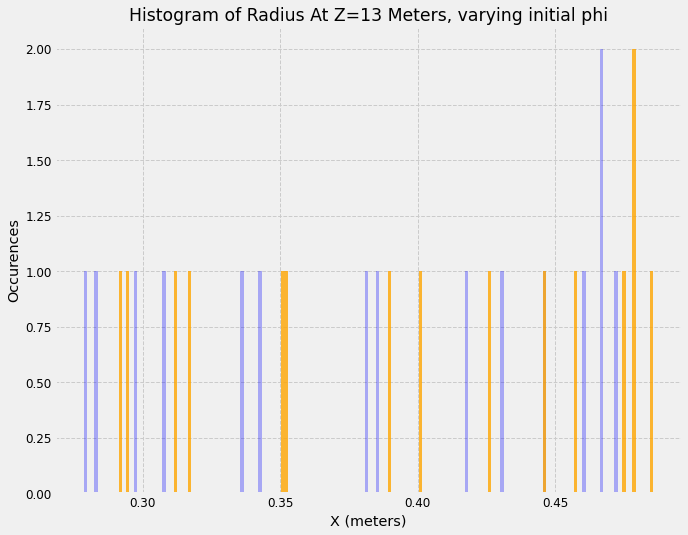

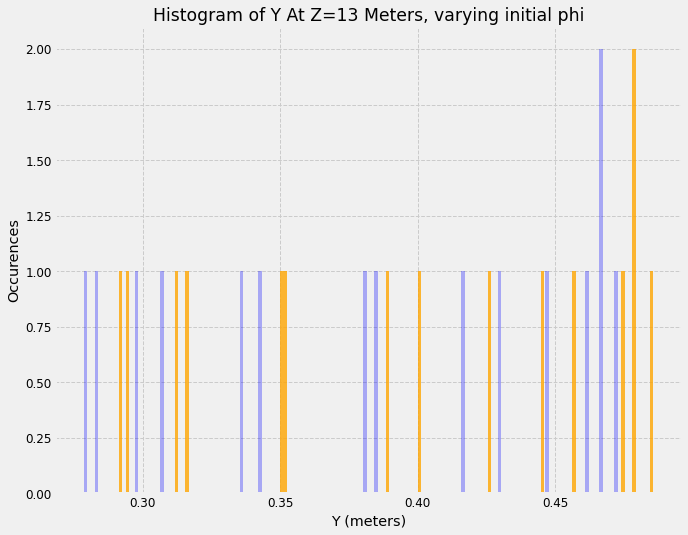

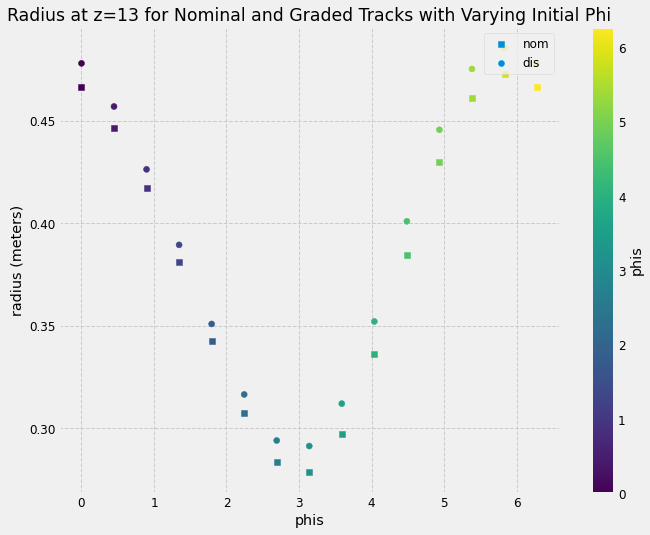

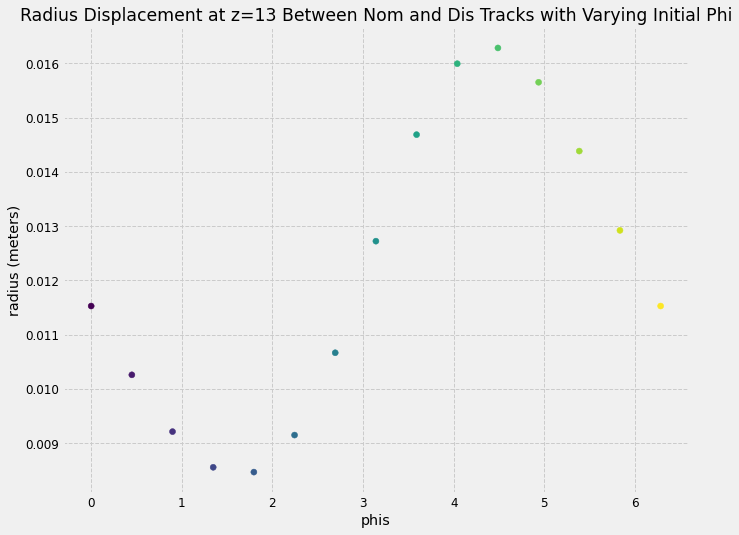

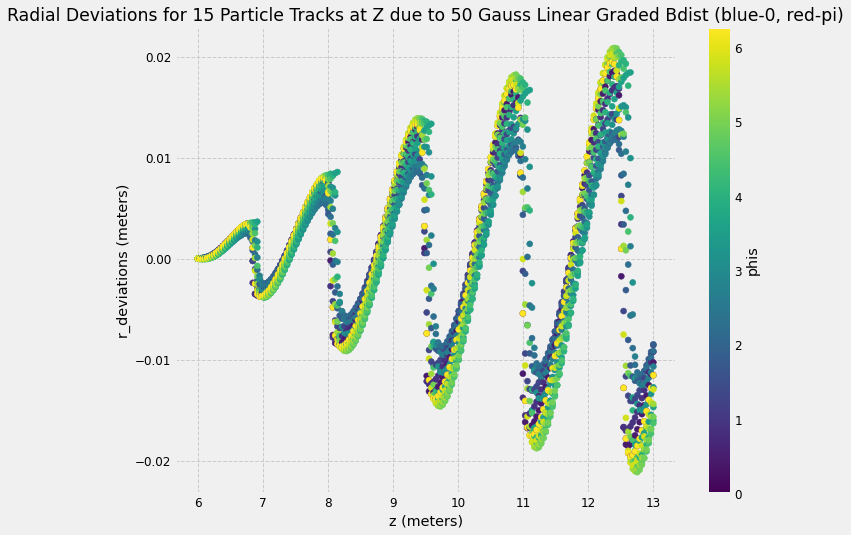

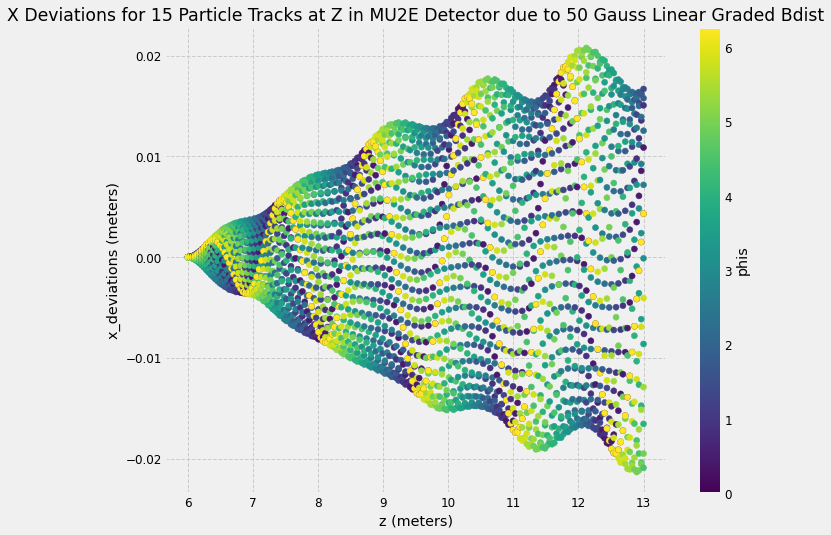

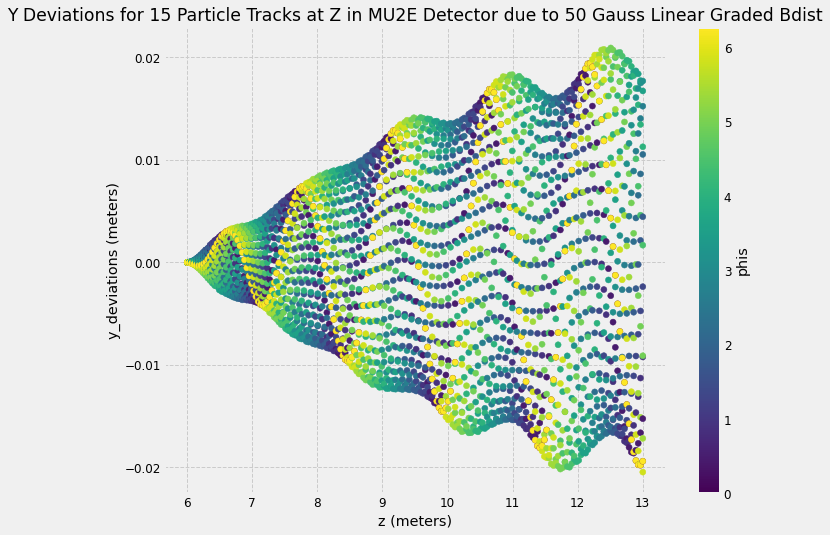

In [2]:
%run ../main.py

In [4]:
df1

X         Y          Z             T         R
phi      z_val                                                           
0.000000 6.000000   0.073281  0.039613   5.999990  7.400000e-11  0.083302
         6.035176   0.132387  0.053886   6.035176  3.089510e-10  0.142933
         6.070352   0.185016  0.084389   6.070384  5.440000e-10  0.203353
         6.105528   0.226727  0.128232   6.105520  7.780000e-10  0.260477
         6.140704   0.254474  0.181643   6.140704  1.011122e-09  0.312652
...                      ...       ...        ...           ...       ...
6.283185 12.859296  0.300723  0.198251  12.859296  3.495213e-08  0.360192
         12.894472  0.312645  0.232828  12.894472  3.512147e-08  0.389815
         12.929648  0.319536  0.268734  12.929648  3.529078e-08  0.417518
         12.964824  0.321263  0.305225  12.964814  3.546000e-08  0.443139
         13.000000  0.317798  0.341587  13.000000  3.562925e-08  0.466559

[3000 rows x 5 columns]

In [5]:
df2

phi          0.000000      0.448799      0.897598      1.346397      1.795196  \
z_val                                                                           
6.0   X  7.328123e-02  7.099740e-02  6.536608e-02  5.750261e-02  4.896447e-02   
      Y  3.961260e-02  4.784905e-02  5.427891e-02  5.762869e-02  5.723490e-02   
      Z  5.999990e+00  5.999993e+00  5.999995e+00  5.999997e+00  5.999998e+00   
      T  7.400000e-11  7.400000e-11  7.400000e-11  7.400000e-11  7.400000e-11   
      R  8.330244e-02  8.561637e-02  8.496426e-02  8.141017e-02  7.532166e-02   
...               ...           ...           ...           ...           ...   
13.0  X  3.177979e-01  1.690744e-01  7.766703e-03 -1.384593e-01 -2.448675e-01   
      Y  3.415870e-01  4.135375e-01  4.170581e-01  3.548808e-01  2.393613e-01   
      Z  1.300000e+01  1.300000e+01  1.300000e+01  1.300000e+01  1.300000e+01   
      T  3.562925e-08  3.558566e-08  3.553844e-08  3.549418e-08  3.545360e-08   
      R  4.665588e-01  4.467655e-01  4.171304e-01  3.809348e-01  3.424236e-01   

phi          2.243995      2.692794      3.141593      3.590392      4.039191  \
z_val                                                                           
6.0   X  4.144272e-02  3.642715e-02  3.491115e-02  3.719498e-02  4.282631e-02   
      Y  5.317554e-02  4.625462e-02  3.784292e-02  2.960647e-02  2.317661e-02   
      Z  5.999998e+00  5.999998e+00  5.999996e+00  5.999993e+00  5.999991e+00   
      T  7.400000e-11  7.400000e-11  7.400000e-11  7.400000e-11  7.400000e-11   
      R  6.741763e-02  5.887637e-02  5.148665e-02  4.753956e-02  4.869546e-02   
...               ...           ...           ...           ...           ...   
13.0  X -2.933573e-01 -2.763580e-01 -1.965382e-01 -6.441248e-02  1.022730e-01   
      Y  9.161835e-02 -6.253582e-02 -1.974510e-01 -2.902688e-01 -3.201781e-01   
      Z  1.300000e+01  1.300000e+01  1.300000e+01  1.300000e+01  1.299998e+01   
      T  3.541650e-08  3.538700e-08  3.537279e-08  3.538461e-08  3.543000e-08   
      R  3.073311e-01  2.833452e-01  2.785932e-01  2.973296e-01  3.361157e-01   

phi          4.487990      4.936788      5.385587      5.834386      6.283185  
z_val                                                                          
6.0   X  5.068977e-02  5.922792e-02  6.674966e-02  7.176523e-02  7.328123e-02  
      Y  1.982684e-02  2.022063e-02  2.427999e-02  3.120090e-02  3.961260e-02  
      Z  5.999989e+00  5.999988e+00  5.999988e+00  5.999989e+00  5.999990e+00  
      T  7.400000e-11  7.400000e-11  7.400000e-11  7.400000e-11  7.400000e-11  
      R  5.442937e-02  6.258451e-02  7.102841e-02  7.825436e-02  8.330244e-02  
...               ...           ...           ...           ...           ...  
13.0  X  2.735104e-01  4.057423e-01  4.597528e-01  4.244898e-01  3.177979e-01  
      Y -2.705502e-01 -1.423982e-01  3.329980e-02  2.079129e-01  3.415872e-01  
      Z  1.300000e+01  1.300000e+01  1.300000e+01  1.300000e+01  1.300000e+01  
      T  3.550361e-08  3.558306e-08  3.563886e-08  3.565286e-08  3.562925e-08  
      R  3.847147e-01  4.300048e-01  4.609572e-01  4.726726e-01  4.665590e-01  

[1000 rows x 15 columns]

In [6]:
nomfinaldatares

array([[[ 7.32812328e-02,  3.96125997e-02,  5.99999040e+00,
          7.40000000e-11,  8.33024437e-02],
        [ 7.09974016e-02,  4.78490480e-02,  5.99999270e+00,
          7.40000000e-11,  8.56163678e-02],
        [ 6.53660782e-02,  5.42789148e-02,  5.99999508e+00,
          7.40000000e-11,  8.49642559e-02],
        ...,
        [ 6.67496626e-02,  2.42799860e-02,  5.99998775e+00,
          7.40000000e-11,  7.10284111e-02],
        [ 7.17652320e-02,  3.12008989e-02,  5.99998863e+00,
          7.40000000e-11,  7.82543585e-02],
        [ 7.32812328e-02,  3.96125997e-02,  5.99999040e+00,
          7.40000000e-11,  8.33024437e-02]],

       [[ 1.32386894e-01,  5.38856406e-02,  6.03517588e+00,
          3.08950955e-10,  1.42933383e-01],
        [ 1.17995304e-01,  8.62831860e-02,  6.03517588e+00,
          3.08677941e-10,  1.46176879e-01],
        [ 9.09693311e-02,  1.09112017e-01,  6.03511457e+00,
          3.08000000e-10,  1.42059324e-01],
        ...,
        [ 1.14882254e-01, -1.3065294